# Using Expected Borda Counts

In [1]:
import utils
from classes import Voter
import visualize
import random

In [2]:
import numpy as np

In [3]:
NUM_VOTERS = 50
CANDIDATES = np.arange(0, 5)
NUM_CANDIDATES = len(CANDIDATES)

In [4]:
voters = []
for _ in range(NUM_VOTERS):
    variable = random.uniform(-1, 1)
    ut_func = lambda x: 0.5 + 0.5 * np.sin((x + variable) * np.pi / NUM_CANDIDATES)
    voters.append(Voter(ut_func))

In [5]:
expected_borda = utils.compute_expected_borda(voters=voters, candidates=CANDIDATES)

In [6]:
true_ranking = {candidate : utils.avg_candidate_utility(candidate, voters) for candidate in CANDIDATES}

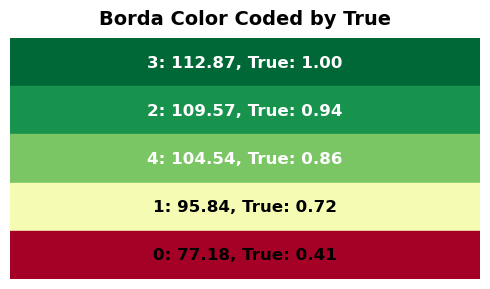

In [7]:
visualize.plot_borda_ranking(expected_borda, true_ranking)

In [8]:
from math import dist


w = np.array([NUM_CANDIDATES - i for i in range(NUM_CANDIDATES)])
V_society = utils.avg_society_utility(expected_borda, w, voters)
V_optimal = utils.avg_society_utility(true_ranking, w, voters)
distortion = V_optimal / V_society

In [9]:
print(f"Distortion: {distortion}")

Distortion: 1.0


## Trying Different Temperatures

In [10]:
results = {}

for temperature in [0.0001, 0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 200.0]:
    expected_borda_temp = utils.compute_expected_borda(voters=voters, candidates=CANDIDATES, beta=temperature)
    V_society_temp = utils.avg_society_utility(expected_borda_temp, w, voters)
    distortion_temp = V_optimal / V_society_temp
    results[temperature] = distortion_temp
    print(f"Temperature: {temperature}, Distortion: {distortion_temp}")

Temperature: 0.0001, Distortion: 1.0
Temperature: 0.3, Distortion: 1.0
Temperature: 0.5, Distortion: 1.0
Temperature: 0.7, Distortion: 1.0
Temperature: 0.9, Distortion: 1.0
Temperature: 1.0, Distortion: 1.0
Temperature: 1.2, Distortion: 1.0
Temperature: 1.5, Distortion: 1.0
Temperature: 200.0, Distortion: 1.0
